Biocham 4.4.2
Copyright (C) 2003-2020 Inria, EPI Lifeware, Saclay-Île de France, France,
license GNU GPL 2, http://lifeware.inria.fr/biocham4/


# "Hello world" in the Biochemical Abstract Machine language BIOCHAM 

### Biocham syntax: rule-based language 
* Formal biochemical reactions with rate functions
* Formal molecular species with initial concentrations

### Biocham semantics: three interpretations
* Differential semantics (Ordinary Differential Equations) and ODE simulator
* Stochastic semantics (Continuous-Time Markov Chains) and CTMC simulator
* Boolean semantics (asynchronuous non-deterministic Boolean transitions) and model-checker

### Jupyter notebook with Biocham kernel
* Shift-Return to execute a cell
* Kernel menu: restart to clear session
* Biocham command: clear_model to clear the current model
* File menu: to save or download your notebooks

F. Fages, Feb 2020

# Syntax of Reactions
* formal chemical reactions
* structure: reactants with stoichiometric coefficients => products with stoichiometric coefficients
* default kinetics: mass action law kinetics with rate constant=1
* Warning: if you enter twice the same reaction it will count for two and will double the reaction rate

### 1) Synthesis reactions
* nothing gives something

In [1]:
_ => A.

In [2]:
_ => 2*B.

In [3]:
numerical_simulation. plot.

In [4]:
list_ode.

### 2) Degradation reactions
* formal inverse of synthesis

In [5]:
A => _.

In [6]:
B => _.

In [7]:
numerical_simulation. plot.

In [8]:
list_ode.

### 3) Binding, complexation reactions
* assembly of two molecules 
* adhesive interaction

In [9]:
A+B => C.

In [10]:
numerical_simulation. plot.

### 4) Unbinding, decomplexation reactions
* reversible binding
* formal inverse of binding reaction
* creation of an equilibrium

In [11]:
C => A+B.

In [12]:
numerical_simulation. plot.

In [13]:
numerical_simulation(time: 100). plot.

### 5) Modification, transformation reactions
* phosphorylation of a protein: addition of a phosphate group to one amino acid of a protein
* acetylation, methylation, ...

In [14]:
C => Cp.

In [15]:
numerical_simulation. plot.

In [16]:
Cp => A.

In [17]:
numerical_simulation. plot.

In [18]:
list_ode.

### Chemical reaction network (CRN)
* hypergraph represented by a bipartite graph of species and reactions

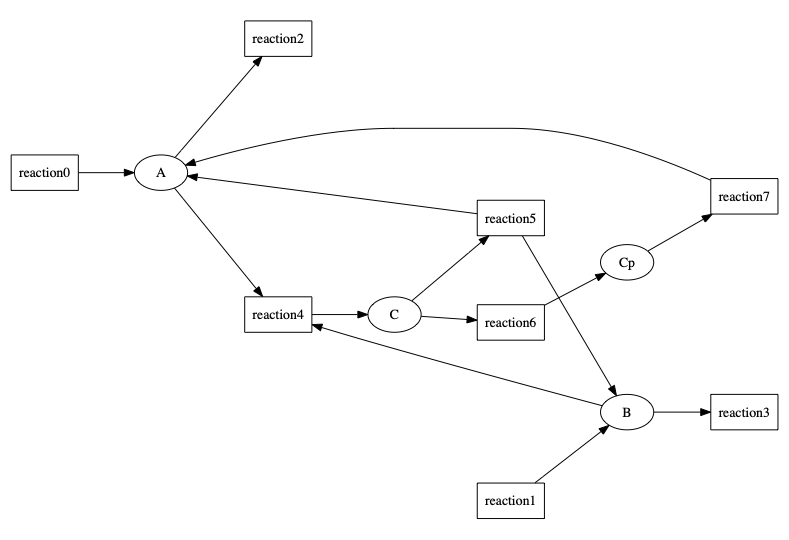

In [19]:
draw_reactions.

### Influence graph
* positive and negative influences between molecular species
* abstraction of the reaction hypergraph
* graph of signs of the Jacobian matrix of the associated ODEs

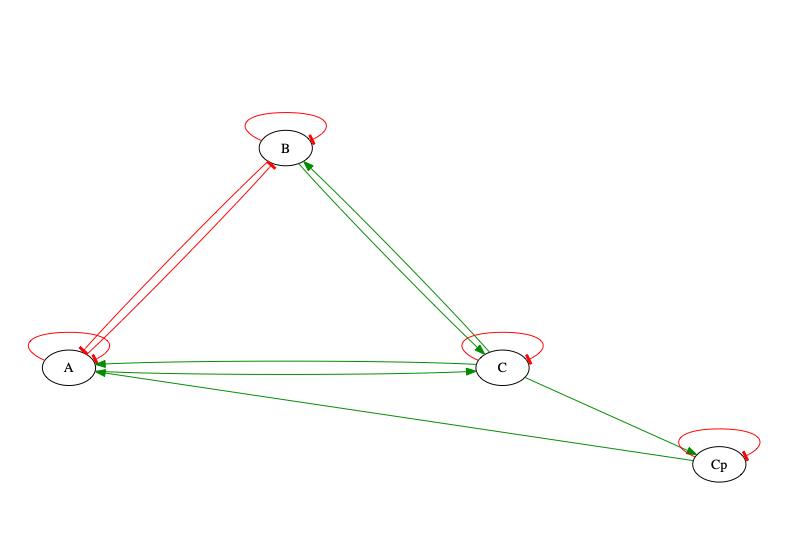

In [20]:
draw_influences.

In [21]:
list_ode.

### Reaction rate functions
* Mass action law kinetics MA(k) = k * A1 * ... * An *(default kinetics with rate constant =1)*
* Michaelis-Menten kinetics MM(v, k) = v * A/(k+A)
* Hill of order n kinetics Hillv, k, n) = v * A^n/(k^n+A^n)

In [22]:
list_functions.

From inherited 'initial':
[0] function MA(k)=k*product(S*M in [reactants],M^S)
[1] function MAI(k)=k*product(S*M in [reactants],M^S)/(1+sum(M in [inhibitors],M))
[2] function MM(Vm, Km)=Vm*single_reactant/(Km+single_reactant)
[3] function Hill(Vm, Km, n)=Vm*single_reactant^n/(Km^n+single_reactant^n)
[4] function HillI(Vm, Km, n)=Vm*single_reactant^n/(Km^n+single_reactant^n+sum(M in [inhibitors],M^n))


In [23]:
list_model.

MA(1) for _=>A.
MA(1) for _=>2*B.
MA(1) for A=>_.
MA(1) for B=>_.
MA(1) for A+B=>C.
MA(1) for C=>A+B.
MA(1) for C=>Cp.
MA(1) for Cp=>A.


### Parametrization
* automatic replacement of numbers by parameters initialized to same value

In [24]:
parametrize.

In [25]:
list_model.

MA(k1) for _=>A.
MA(k2) for _=>2*B.
MA(k3) for A=>_.
MA(k4) for B=>_.
MA(k5) for A+B=>C.
MA(k6) for C=>A+B.
MA(k7) for C=>Cp.
MA(k8) for Cp=>A.
parameter(
  k1 = 1,
  k2 = 1,
  k3 = 1,
  k4 = 1,
  k5 = 1,
  k6 = 1,
  k7 = 1,
  k8 = 1
).


## Differential semantics
* interpretration by Ordinary Differential Equation (ODE)

In [26]:
list_ode.

In [27]:
numerical_simulation. plot.

In [28]:
option(time:10). numerical_simulation. plot.

In [29]:
%slider k1 k2 k3 k4 k5 k6 k7 k8

Box(children=(SelectionSlider(continuous_update=False, description='k1', index=10, layout=Layout(min_width='30…

# Stochastic semantics
* interpretation by continuous time Markov chain (CTMC)
* Stochastic simulation algorithm (SSA)
* numbers of molecules with conversion factor from concentration (100 by default) here 1 for gene in single copy
* reaction rates as propensities to react give probabilities of reactions after normalization
* time of next reaction given by exponential law

In [30]:
option(method:ssa, stochastic_conversion: 10). 
numerical_simulation. plot.

In [31]:
%slider k1 k2 k3 k4 k5 k6 k7 k8

Box(children=(SelectionSlider(continuous_update=False, description='k1', index=10, layout=Layout(min_width='30…

# Boolean Semantics
* interpretation by asynchronous Boolean transition system
* presence/absence of molecular species: concentration >0/0 

In [32]:
generate_ctl_not.

reachable(steady(A))
reachable(steady(B))
reachable(steady(C))
reachable(steady(Cp))
reachable(steady(not A))
reachable(steady(not B))
reachable(steady(not C))
reachable(steady(not Cp))
oscil(A)
oscil(B)
oscil(C)
oscil(Cp)
